### Imports

We do the imports of some basic libs.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from os.path import join as path_join
from os import makedirs

In [2]:
# Setting random seed for reproducibility of the results
torch.manual_seed(0)
np.random.seed(0)

Change `IMG_TO_FILE` to True if you want to store the generated images to an `img` folder instead of plotting here.

In [3]:
IMG_TO_FILE = True  # Set this to true if you want to store the outputs in specific files

You can also define the paths of the folders were to store the images and the dataset

In [4]:
IMG_PATH = path_join("./img")
DATA_PATH = '../data'

In [5]:
def plot_fig(name=None, **args):
    if IMG_TO_FILE and name is not None:
        makedirs(IMG_PATH, exist_ok=True)
        plt.savefig(path_join(IMG_PATH, name), **args)
        print(f"Saving image to {path_join(IMG_PATH, name)}")
    else:
        plt.show(**args)

In [6]:
# Download and process the dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root=DATA_PATH, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,  batch_size=len(trainset), # batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root=DATA_PATH, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), # batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = trainset.classes

Files already downloaded and verified
Files already downloaded and verified


In [7]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [8]:
# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
#
# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [9]:
X_train, y_train = next(iter(trainloader))
X_train = X_train.reshape((X_train.shape[0], np.prod(X_train.shape[1:])))

In [13]:
X_test, y_test = next(iter(testloader))
X_test = X_test.reshape((X_test.shape[0], np.prod(X_test.shape[1:])))

In [ ]:
dt = tree.DecisionTreeClassifier()
dt_fit = dt.fit(X_train, y_train)
print(f"The depth of this tree is {dt_fit.get_depth()} and it has {dt_fit.get_n_leaves()} leaves")
tree.plot_tree(dt_fit)
plot_fig("out_of_the_shelf_dt.pdf")

In [12]:
print(classification_report(y_test, dt_fit.predict(X_test), target_names=classes))

              precision    recall  f1-score   support

    airplane       0.34      0.34      0.34      1000
  automobile       0.29      0.27      0.28      1000
        bird       0.21      0.23      0.22      1000
         cat       0.20      0.20      0.20      1000
        deer       0.22      0.23      0.22      1000
         dog       0.22      0.22      0.22      1000
        frog       0.28      0.28      0.28      1000
       horse       0.27      0.26      0.27      1000
        ship       0.36      0.39      0.37      1000
       truck       0.30      0.29      0.29      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [10]:
parameters = {'max_depth': (5, 10, 15, 20, 30),
              #'min_samples_split': (2,3,5,10,15,20),
              'min_samples_leaf': (2,5,10,15,20),
              'max_features': ('sqrt', 'log2', None)}
opt_dt = RandomizedSearchCV(tree.DecisionTreeClassifier(), parameters, cv=3, n_jobs=-1, refit=True, n_iter=20)
opt_dt_fit = opt_dt.fit(X_train, y_train) # Hyper-parameter optimized DT
print(f"The depth of this tree is {opt_dt_fit.best_estimator_.get_depth()} and it has {opt_dt_fit.best_estimator_.get_n_leaves()} leaves")


The depth of this tree is 10 and it has 756 leaves


NameError: name 'y_test' is not defined

In [14]:
print(classification_report(y_test, opt_dt_fit.best_estimator_.predict(X_test), target_names=classes))

              precision    recall  f1-score   support

    airplane       0.38      0.43      0.40      1000
  automobile       0.36      0.30      0.33      1000
        bird       0.22      0.19      0.20      1000
         cat       0.17      0.18      0.18      1000
        deer       0.26      0.25      0.26      1000
         dog       0.28      0.21      0.24      1000
        frog       0.29      0.44      0.35      1000
       horse       0.30      0.27      0.29      1000
        ship       0.44      0.45      0.45      1000
       truck       0.35      0.35      0.35      1000

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.30     10000
weighted avg       0.31      0.31      0.30     10000



Saving image to ./img\tuned_dt.pdf


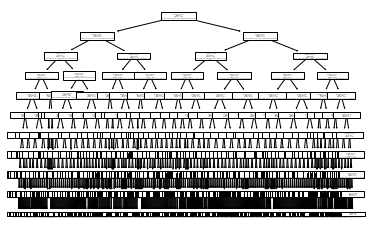

In [15]:
tree.plot_tree(opt_dt_fit.best_estimator_)
plot_fig("tuned_dt.pdf")

In [17]:
opt_dt_fit.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Tree with 2 and 4 leaves
2 & 4 & 0.1955


C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Saving image to ./img\many_sizes_of_trees_2.pdf
Tree with 3 and 8 leaves
3 & 8 & 0.2394


C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Saving image to ./img\many_sizes_of_trees_3.pdf
Tree with 5 and 32 leaves
5 & 32 & 0.2669
Saving image to ./img\many_sizes_of_trees_5.pdf
Tree with 7 and 128 leaves
7 & 128 & 0.293
Saving image to ./img\many_sizes_of_trees_7.pdf
Tree with 9 and 453 leaves
9 & 453 & 0.3053
Saving image to ./img\many_sizes_of_trees_9.pdf


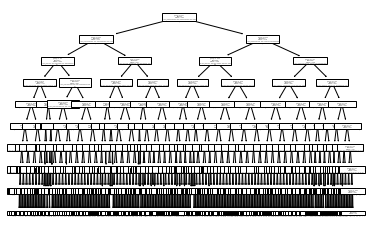

In [23]:
depths = (2,3,5,7,9)

best_params = {'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

many_trees = list()
for depth in depths:
    depth_dt = tree.DecisionTreeClassifier(max_depth=depth, **best_params)
    depth_dt_fit = depth_dt.fit(X_train, y_train)
    print(f"Tree with {depth_dt_fit.get_depth()} and {depth_dt_fit.get_n_leaves()} leaves")
    acc = classification_report(y_test,
                                depth_dt_fit.predict(X_test),
                                target_names=classes, output_dict=True)['accuracy']
    print(f"{depth_dt_fit.get_depth()} & {depth_dt_fit.get_n_leaves()} & {acc}")
    tree.plot_tree(depth_dt_fit)
    plot_fig(f"many_sizes_of_trees_{depth}.pdf")
    many_trees.append(depth_dt_fit)

In [ ]:
for tree in many_trees:
    acc = classification_report(y_test,
                                tree.predict(X_test),
                                target_names=classes, output_dict=True)['accuracy']
    many_trees.append(depth_dt)

C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\comp-263-essay-on-explainability\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [19]:
classification_report(y_test, opt_dt_fit.best_estimator_.predict(X_test), target_names=classes,output_dict=True)['accuracy']

{'airplane': {'precision': 0.38227394807520143,
  'recall': 0.427,
  'f1-score': 0.4034010392064242,
  'support': 1000},
 'automobile': {'precision': 0.3589435774309724,
  'recall': 0.299,
  'f1-score': 0.3262411347517731,
  'support': 1000},
 'bird': {'precision': 0.21820303383897316,
  'recall': 0.187,
  'f1-score': 0.20140010770059236,
  'support': 1000},
 'cat': {'precision': 0.1738703339882122,
  'recall': 0.177,
  'f1-score': 0.17542120911793854,
  'support': 1000},
 'deer': {'precision': 0.2581967213114754,
  'recall': 0.252,
  'f1-score': 0.2550607287449393,
  'support': 1000},
 'dog': {'precision': 0.28112449799196787,
  'recall': 0.21,
  'f1-score': 0.2404121350887235,
  'support': 1000},
 'frog': {'precision': 0.2878590078328982,
  'recall': 0.441,
  'f1-score': 0.34834123222748814,
  'support': 1000},
 'horse': {'precision': 0.3040089086859688,
  'recall': 0.273,
  'f1-score': 0.28767123287671226,
  'support': 1000},
 'ship': {'precision': 0.44259077526987245,
  'recall': 0